In [1]:
path = "/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11"

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [3]:
import os
os.listdir(path)

['yolov8n-face.pt',
 'An.mp4',
 'Dang.mp4',
 'Chung.mp4',
 'test.ipynb',
 'Untitled0.ipynb',
 'output_images']

In [6]:
from ultralytics import YOLO


model = YOLO(os.path.join(path, "yolov8n-face.pt"))

# Display model information (optional)
model.info()


results = model("/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11/output_images/Dang/frame_0.jpg")

YOLOv8n-pose summary: 144 layers, 3,083,424 parameters, 0 gradients, 8.4 GFLOPs

image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11/output_images/Dang/frame_0.jpg: 384x640 1 face, 83.6ms
Speed: 12.8ms preprocess, 83.6ms inference, 397.0ms postprocess per image at shape (1, 3, 384, 640)


In [11]:
# prompt: cắt hình theo bounding box đã lấy được ở trên và hiển thị boundiung box đó và lưu lại vào 1 folder khác trong thư mục cropped, các hình ảnh lấy từ các folder trong folder output_images (chỉ luuw các hình đã  được crop) và lưu riêng vào mỗi folder

import os
from ultralytics import YOLO
from PIL import Image
import cv2

path = "/content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11"
model = YOLO(os.path.join(path, "yolov8n-face.pt"))

output_images_folder = os.path.join(path, "output_images")
cropped_images_folder = os.path.join(path, "cropped")

# Create the cropped images folder if it doesn't exist
os.makedirs(cropped_images_folder, exist_ok=True)

for subdir, _, files in os.walk(output_images_folder):
  for file in files:
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Add more image extensions if needed
      img_path = os.path.join(subdir, file)
      results = model(img_path)

      # Extract the relative path to create subfolders in 'cropped'
      relative_path = os.path.relpath(subdir, output_images_folder)
      cropped_subdir = os.path.join(cropped_images_folder, relative_path)

      # Create the subdirectory in 'cropped' if it doesn't exist
      os.makedirs(cropped_subdir, exist_ok=True)

      for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        img = Image.fromarray(im_array[..., ::-1]) # Convert BGR to RGB

        boxes = r.boxes
        for box in boxes:
          # Extract bounding box coordinates
          x1, y1, x2, y2 = map(int, box.xyxy[0])

          # Crop the image using bounding box coordinates
          original_image = cv2.imread(img_path)
          cropped_img = original_image[y1:y2, x1:x2]

          #Save the cropped image
          cropped_img_path = os.path.join(cropped_subdir, f"{os.path.splitext(file)[0]}_cropped_{box.id}.jpg") # Added box id to the name
          cv2.imwrite(cropped_img_path, cropped_img)

      # No need to save the image with bounding boxes, only cropped images are saved



image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11/output_images/Dang/frame_30.jpg: 384x640 1 face, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11/output_images/Dang/frame_15.jpg: 384x640 1 face, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11/output_images/Dang/frame_34.jpg: 384x640 1 face, 7.5ms
Speed: 1.6ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 11/output_images/Dang/frame_7.jpg: 384x640 1 face, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/drive/MyDrive/CV nâng cao/Bài tập trên lớp/Tuần 

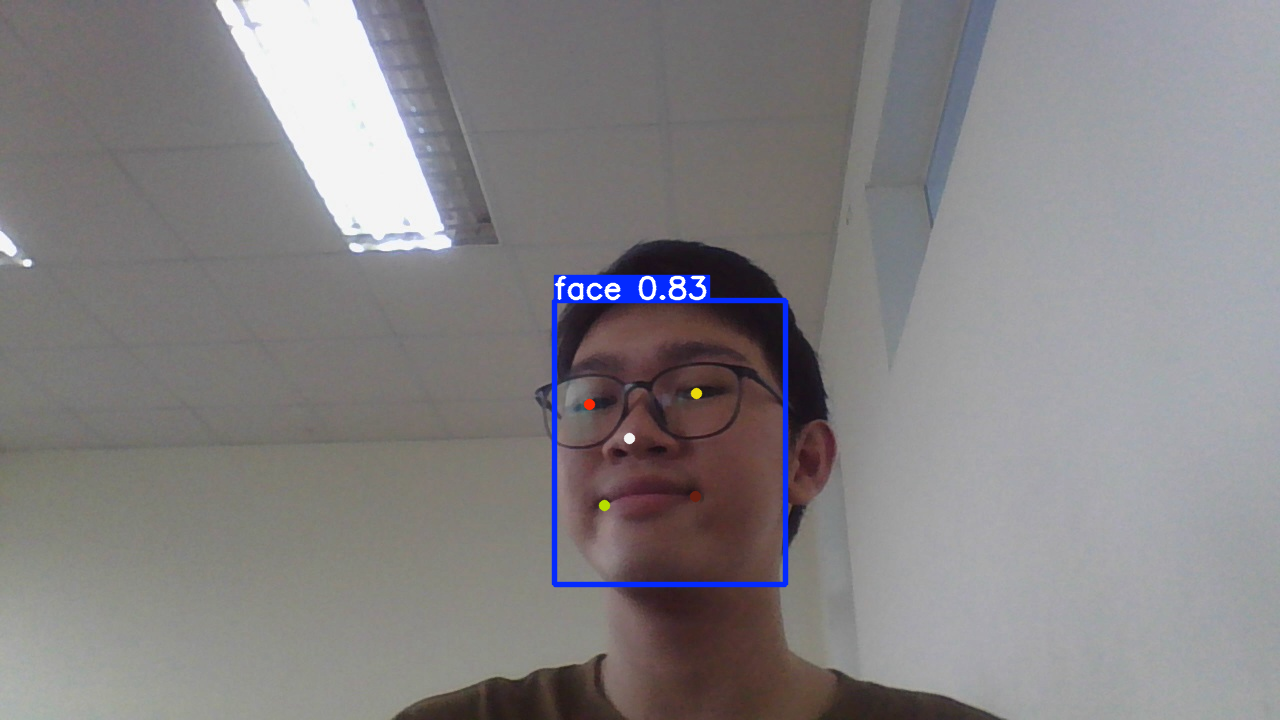

In [7]:
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs
    result.show()  # display to screen
    result.save(filename="result.jpg")  # save to disk